In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importing machine learning libraries

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset

df = pd.read_csv("/content/climate_change_data.csv")

In [3]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [4]:
df.tail()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255
9999,2022-12-31 00:00:00.000000000,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [6]:
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
df.shape

(10000, 9)

In [8]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
df.notnull()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True


In [11]:
df.interpolate()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [13]:
df.dropna()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [14]:
import tensorflow as tf
import numpy as np


In [15]:
np.random.seed(0)
num_samples = 1000
temperature = np.random.uniform(0, 40, num_samples)
humidity = np.random.uniform(0, 100, num_samples)
precipitation = np.random.uniform(0, 10, num_samples)
sea_level = np.random.uniform(-2, 2, num_samples)
carbon_emission = 0.5 * temperature + 0.2 * humidity + 0.1 * precipitation + 0.3 * sea_level + np.random.normal(0, 2, num_samples)

In [16]:
temperature = (temperature - np.mean(temperature)) / np.std(temperature)
humidity = (humidity - np.mean(humidity)) / np.std(humidity)
precipitation = (precipitation - np.mean(precipitation)) / np.std(precipitation)
sea_level = (sea_level - np.mean(sea_level)) / np.std(sea_level)


In [17]:
inputs = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

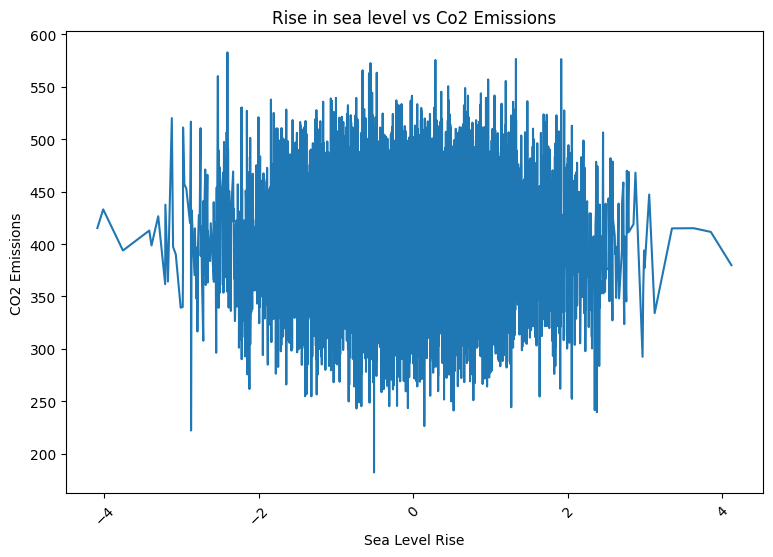

In [21]:
plt.figure(figsize=(9, 6))
sns.lineplot(x='Sea Level Rise', y='', data=df)
plt.title('Rise in sea level vs Co2 Emissions')
plt.xticks(rotation=45)
plt.show()

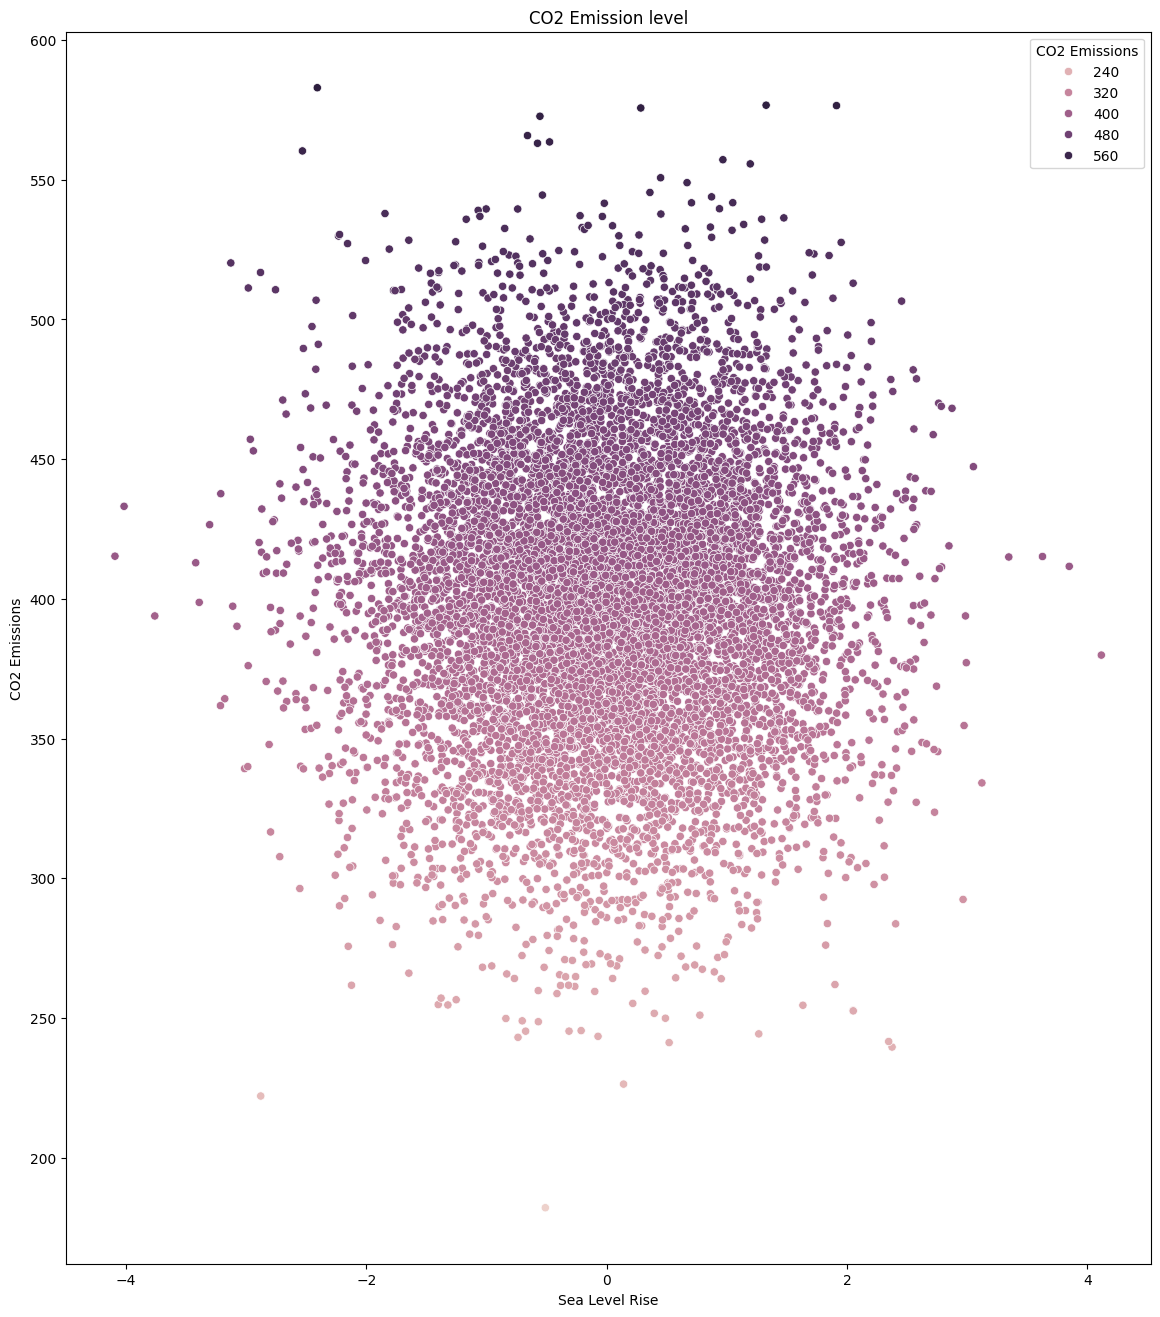

In [25]:

plt.figure(figsize=(14,16))
sns.scatterplot(x='Sea Level Rise', y='CO2 Emissions', hue='CO2 Emissions', data=df)
plt.title('CO2 Emission level')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


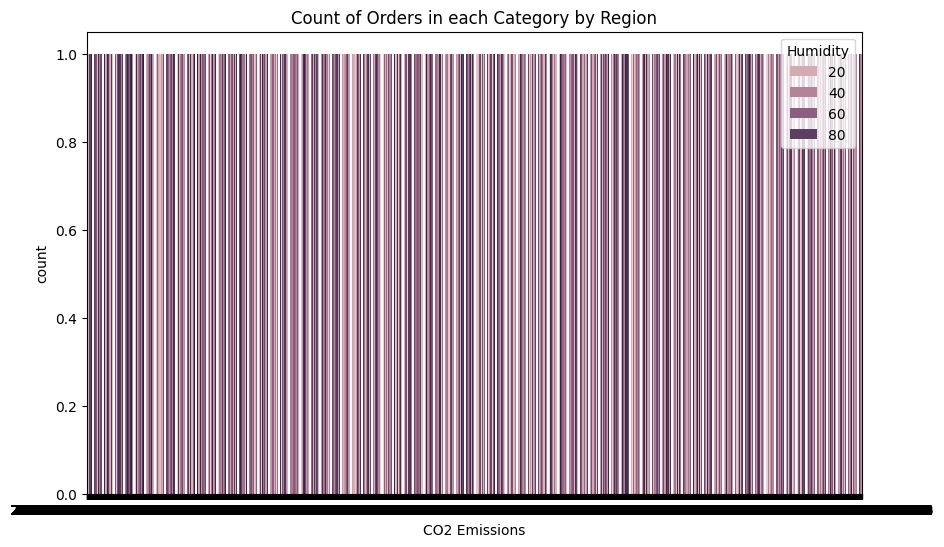

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CO2 Emissions', data=df, hue='Humidity')
plt.title('Count of Orders in each Category by Region')
plt.show()

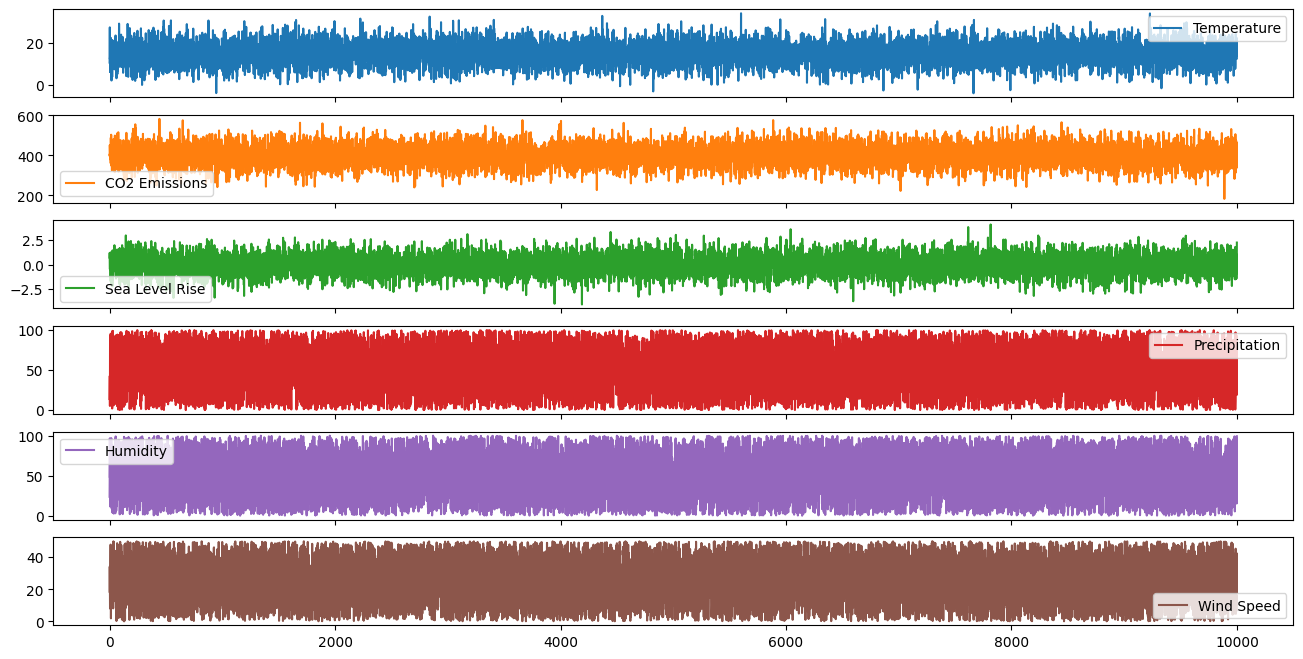

In [34]:
gr = df.plot(figsize = (16, 8), subplots=True)
legend = plt.legend()
legend.prop.set_size(14);

(array([0.00021175, 0.00338799, 0.01556357, 0.04258806, 0.07239176,
        0.07257704, 0.04227043, 0.01273142, 0.00251452, 0.00044997]),
 array([-3.80358860e+00, -2.55341409e-02,  3.75252032e+00,  7.53057477e+00,
         1.13086292e+01,  1.50866837e+01,  1.88647381e+01,  2.26427926e+01,
         2.64208471e+01,  3.01989015e+01,  3.39769560e+01]),
 <BarContainer object of 10 artists>)

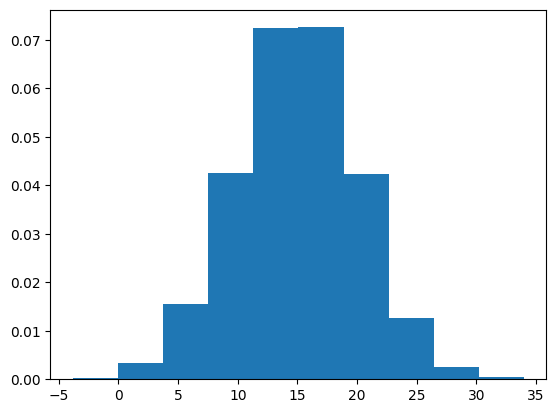

In [32]:
fig, ax = plt.subplots()
ax.hist(df['Temperature'], density = True)

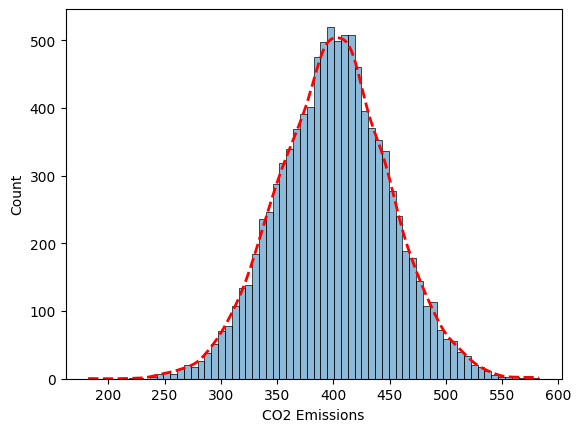

In [30]:
sns.histplot(x = df['CO2 Emissions'], kde = True,
             line_kws = {'linestyle':'dashed',
                         'linewidth':'2'}).lines[0].set_color('red')

(array([4.99041241e-06, 8.23418047e-05, 5.41459746e-04, 2.46775894e-03,
        5.64166123e-03, 8.23168527e-03, 5.44204473e-03, 2.01862182e-03,
        4.81574797e-04, 3.99232993e-05]),
 array([182.13122035, 222.20806845, 262.28491654, 302.36176464,
        342.43861274, 382.51546084, 422.59230893, 462.66915703,
        502.74600513, 542.82285323, 582.89970133]),
 <BarContainer object of 10 artists>)

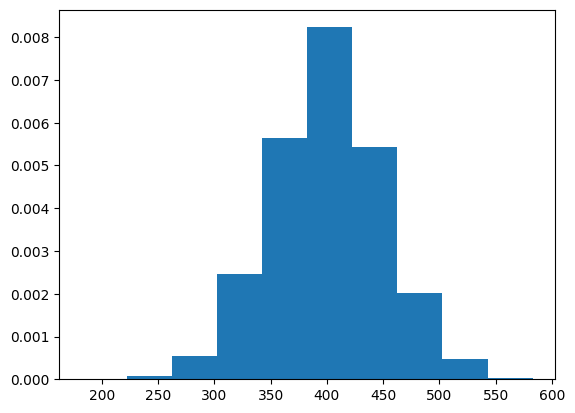

In [42]:


fig, ax = plt.subplots()
ax.hist(df['CO2 Emissions'], density = True)



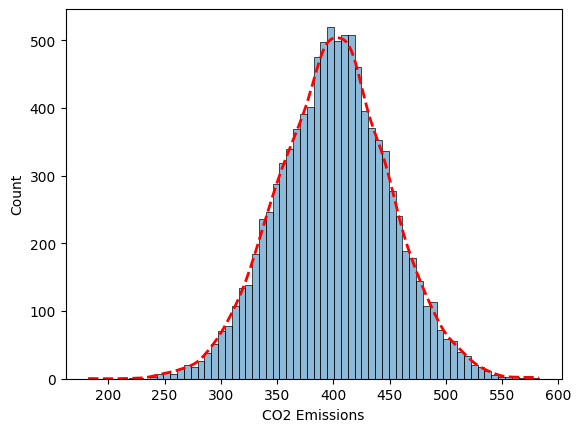

In [40]:
sns.histplot(x = df['CO2 Emissions'], kde = True,
             line_kws = {'linestyle':'dashed',
                         'linewidth':'2'}).lines[0].set_color('red')

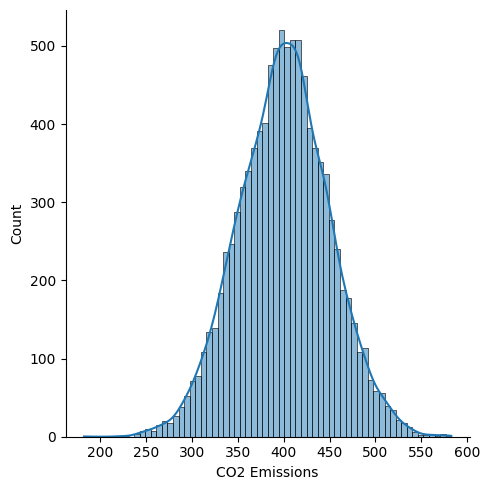

In [39]:


sns.displot(df['CO2 Emissions'], kde = True)



In [45]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

